## Word_embedding

In [ ]:
# 3.ders
# Kelimeler arasındaki anlamsal ilişkileri gösteren vektörlere wordembedding denir
# Elimizdeki wordlerin sayısal vektöre dönüştürülmesi konusunda genelde Word_embedding kullanılıyor(Diğer yöntemlerin handicapları var)

In [ ]:
# Eğer 2 tokenin birlikte sık kullanıldıklarını görürse bunu yakalıyor word_embbeding
# Yani mesela deep ve learning 2 farklı kelime olsa bil bu 2 sini birlikte çok görürse buna anlamsal ilişki yüklüyor
# .. ve bu yapıyı öğreniyor.anlamsal ilişkiyi yakalıyor derken tokenlerin sıklıkla birbirleri ile kullanımlarını kastediyoruz

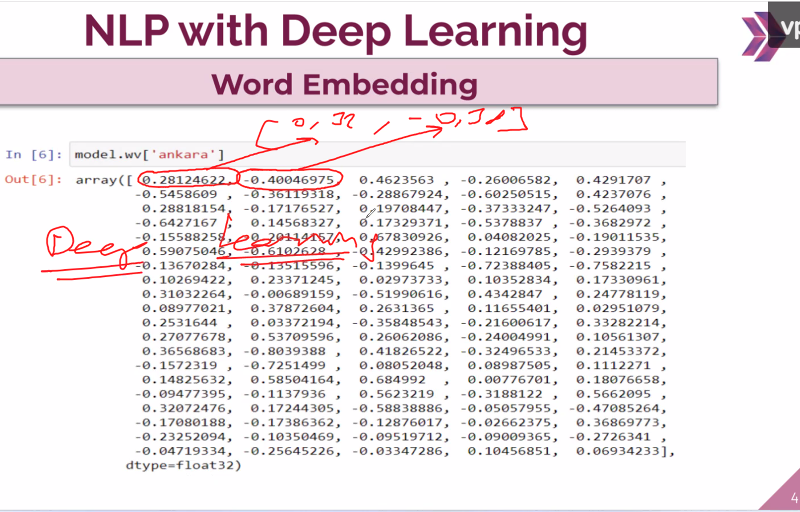

In [ ]:
# Corpus um olsun ve altı tane cümle olsun: 
# öğretmen öğrenciye okulda not verdi
# öğretmen talebeye not verdi
# öğretmen öğrenciye okulda ödev verdi
# eğitmen talebeye üniversitede not verdi
# eğitmen talebeye üniversitede proje yaptı
# eğitmen talebeye üniversitede ödev verdi

# burada geçen unique tokenleri bulalım : öğretmen, öğrenciye, okuldu, "not verme"(Bunu birlikte alalım anlamsal ilişkiyi kaybetmemek adına),
# "proje yapmak", "ödev vermek", eğitmen, talebeye, üniversitede
# 9 tane unique token var.
# Bunların arasındaki feature representation ne olabilir. (Yani bu 9 tane tokeni ortak bir şekilde temsil eden)
# .. Eğitim olabilir, öğretim olabilir

# Eğitim den öğretmenden aldığı im feature representation -->0.95
# Eğitim den eğitmen aldığı im feature representation  --> 0.91
# Öğretim in öğretmenden aldığı im feature representation -- 0.9
# Öğretim in eğitmen aldığı im feature representation  --> 0.88

# Şimdi burada word embedding diyor ki 0.95 ile 0.91 ya da 0.9 ile 0.88 birbirine yakın olduğu için
# öğretmen ve eğitmen arasındaki feature representation(1-2 tane olabilir) arasında anlamsal ilişkiler kuruyor
# .. yani anlamsal olarak birbirlerine yakın olduğun anlıyor(öğretmen ve eğitmenin)
# Bu anlamsal ilişkileri cosinus similarity ile belirliyoruz. cosinus similarity 1 ise anlamsal olarak yakınlar
# .. 0 a yaklaştıkça düşer

# class chat soru: Feature sayısı da otomatik belirleniyor öyle mi Hocam? Word embedding de
# Johnson H: Genelde 50, 100 ve 300 dür

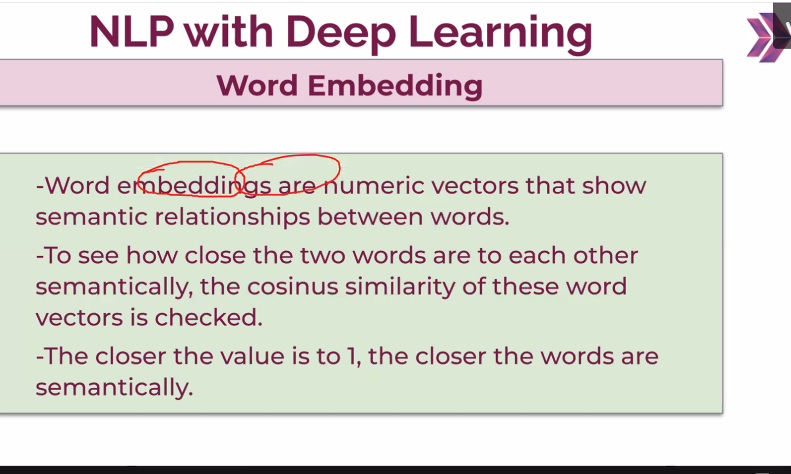

In [ ]:
# datamdan 6 tane tokeni alalım
"""
Gender: Man   = -1   Demekki gender ile %100 ilişkili bu iki kelime ama birbirlerinin tam zıttı
         Woman =  1
# Bir kişiye kadın veya erkek diyebilmem için "gender" feature ına ihtiyacı var. O yüzden 1 ve -1 demiş

        King   = -0.95  Model, King-Queen'in anlamsal olarak birbirine yakın olduğunu fakat gender özelliği üzerinden de birbirlerinin zıttı
        Queen  = 0.07   .. olduğunu anlamış
# FEATURE REPRESENTATION açıklaması: King ve queen arasındaki anlamsal ilişkiyi gender feature representation ı üzerinden çok güzel bir şekilde kurmuş!!!

        Apple  = 0.00  Model, bunların gender ile bir ilgisi olmadığını anlamış
        Orange = 0.01
# King ve Queen üzerindeki ilişkiyi gender, royal, age i kullanarak belirledik(3 tanesini kullandık)

Royal: Man   = 0.01    Model, bunların royal ile bir ilgisi olmadığını anlamış
       Woman = 0.02

       King   = 0.93  Model, King-Queen'in kraliyetle direk ikişili olduğunu anlamış bu yüzden
        Queen  = 0.95  .. zıt işaretler yok

.......

Age:   King = 0.7     King-Queen olabilmek için belli bir yaşa gelmek gerekir. Bu yüzden age ile
       Queen = 0.69   .. güçlü bir ilişki var. Erkek veya bayan olmanızla yaşın bir etkisi yok

.....

Food:  Apple = 0.95, 
        Orange = 0.97 

# SONUÇ: 
# man ve woman üzerindeki ilişkiyi gender ı kullanarak belirledik(1 tanesini kullandık)
# King ve Queen üzerindeki ilişkiyi gender, royal, age i kullanarak belirledik(3 tanesini kullandık)
# man ve woman birbirlerinin yerine kullanılabilir, ya da sıklıkla birlikte kullanılabilir(Anlamsal olarak birbirlerine yakın olduklarından değil, anlamsal ilişkileri olduğu için)
"""
# Modelimiz feature representation ları arka planda belirliyor

# class chat soru: Hocam bu değerler corpustaki bütün tokenlerin birbiri ile cosinus similarity değerleri değil mi?
# Johnson: Hayır hocam. Bu(alttaki tablodaki) değerlerin cosinus similarty ile aldığımız değerler ile alakası yok
# .. cosinüs similartiy uzaydaki vektörler arasındaki açıya bakarak bir sonuç çıkartacak

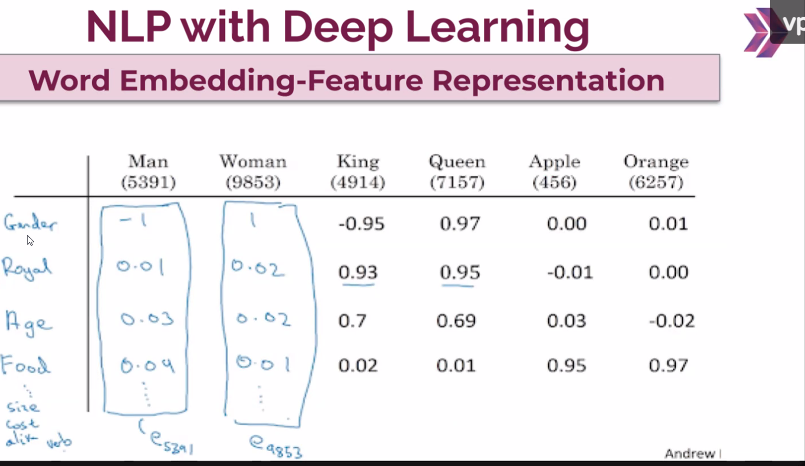

In [ ]:
# Elde ettiğimiz vektörleri uzayda görselleştirdimiz zaman
# cat ve kitten ın genelde aynı tokenlerle kullanıldığını bilmiş. Yani bunlar anlamsal olarak birbirine daha yakın
# cat ve dog un feature representation ı hayvandır, evcil olması, canlı olması olabilir. Bunlar arasında da bir anlamsal ilişki kurabilir(uzayda yakın olurlar)
# cat ile house arasında mesafe daha yüksek cat ve dog a göre. Yani cat ve dog arasında daha yüksek bir anlamsal ilişki kurmuş
# House a atadığı yüksek anlamda cat ve dog un evde yaşamasından dolayı bunlarla bir anlamsal ilişki kurmuş(düşük düzeyde)

# Man in woman ile olan anlamsal ilişkisi, King ile queen arasında olan anlamsal ilişkiye göre daha yakın
# .. yani man ile woman arasındaki anlamsal ilişkisi daha yüksek.
# .. Ancak dikkat edersek man king e daha yakın(Çünkü 2 side erkek) ve woman queen e daha yakın(Çünkü 2 side kadın)

# Buradaki anlamsal ilişkiler ile ilgili bilmemiz gereken;
# 1.Anlamsal ilişkiler DERKEN sözlükdeki anlamsal ilişkileri DEĞİL, birbirleriyle kullanım durumlarına göre olan durumu kastediyoruz
# 2.Anlamsal ilişkiler birbirlerine yakın olan tokenler ile daha yüksek

# NOT: BERT modelleri hariç diğer modellerde birbirlerine yakın olan tokenlerin anlamsal ilişkileri daha yakın

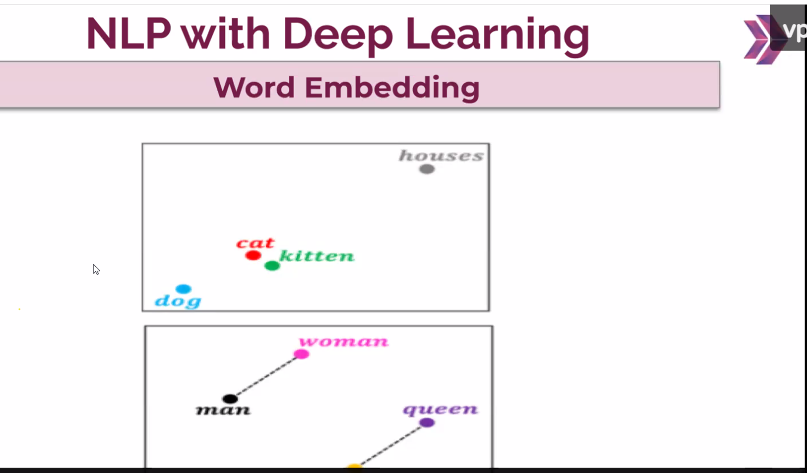

In [ ]:
"""
Mesela bütün feature'lar 100 boyutlu olsun.  Man ve Woman 100 boyutlu vektörleri şu vektörlerle temsil edilsin.
.. (PCA'de birçok feature'ı .. temsil eden bir bileşen gibi)
.. Alttaki 2 vektör arasındaki açı 10 derece olsun

  Man     Woman
   |     /
   |    /
   |   /
   |  /
   | /
   |/

Bu açının cosinüs ü alınır. Cos10.
Benzerlik belirlenirken arka planda cosinus similarity işlemi yapılır. aradaki açı ne kadar dar
.. ise anlamsal olarak birbirlerine o kadar yakınlar demektir. Aradaki açı 0 ise bu iki kelime
.. AYNI kelime demektir
"""

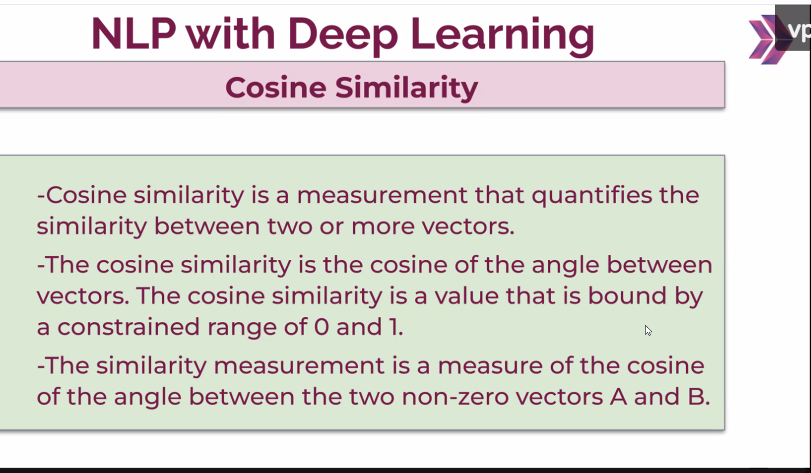

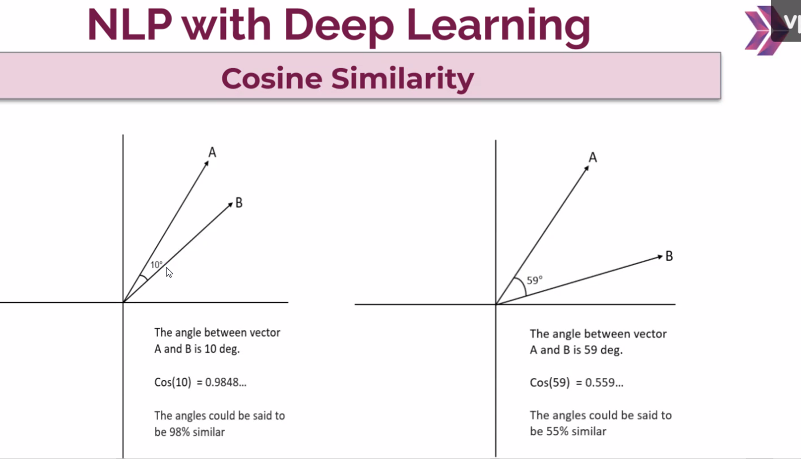

In [ ]:
# Bir çok wordembedding var aslında. Biz Word2Vec ve Glove üzerinden bir şeyler yapacağız
# Word2Vec içinde 2 farklı algoritma var
# Glove aslında Word2Vec alyapısını kullanıyor. Biraz daha farklı

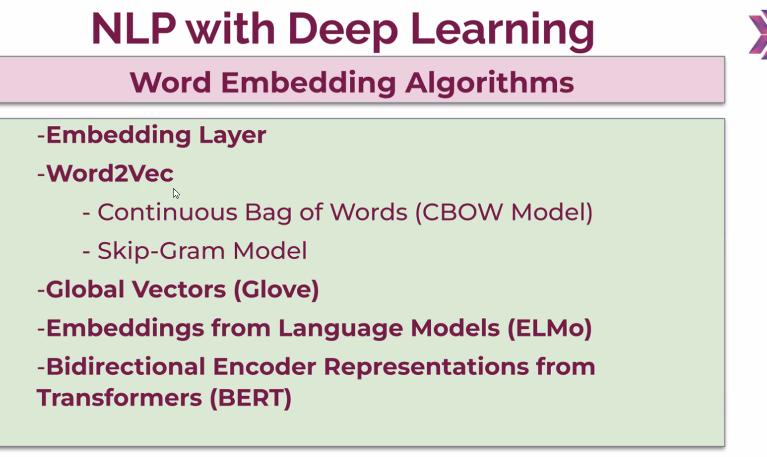

In [ ]:
# Word2Vec altındaki 2 algoritmanın çalışma mantığı ne
# Grammer yapısındaki kalıpları öğrenmeye çalışır
# Kırmızı spor araba trafik kazasına karıştı
# 

# Skip-gram
# Örnek cümle: Kırmızı spor araba trafik kazasına karıştı
# orta kelimeyi verdiğimde sağındaki solundaki kelimeleri öğrenmeye çalışıyor(grammerde kullandığım kalıpları öğreniyor)
# windows_size=2 : Sağımda ve solumdaki kaç tokeni dikkate alarak anlamsal ilişki kurayım
# .. Orta kelime olarak "kırmızı" için w(t-2):boş, w(t-1):boş , w(t+1): spor, w(t+2) : araba olacak
# .. Orta kelime olarak "spor" için w(t-2):boş, w(t-1):kırmızı , w(t+1): araba, w(t+2) : trafik olacak
# Model bunları öğreniyor. # Class chat soru: token patternlerini öğreniyor diyebilir miyiz? # Johnson H: Evet
# Daha büyük pattern leri öğrenmesini istiyorsanız modeli windows_size arttırılır(Genelde 5 veya 10 verilir)
# Daha küçük datalarda tercih edilir

# CBOW
# Örnek cümle: Kırmızı spor araba trafik kazasına karıştı
# windows_size=2 için;
# Kenar kelimeleri verip orta kelimeyi öğrenmeye çalışıyor(grammerde kullandığım kalıpları öğreniyor)
# w(t-2):Kırmızı, w(t-1):Araba,w(t+1):trafik,w(t+2):Kaza olursa, orta kelime trafik olabilir, araba olabilir vs diye
# .. anlamsal ilişkiler kurar
# Daha büyük datalarda tercih edilir

# NOT: windows_size ı arttırsanız bile yine de birbirine yakın olan kelimelere daha çok ağırlık verecektir model


# Class chat: CBOW: Bir bağlam verildiğinde ona en uygun sözcüğü bulma. Skip-gram: Bir kelime verildiğinde bağlamını bulma
# Johnson H: Aslında aynı şeyleri yapıyorlar

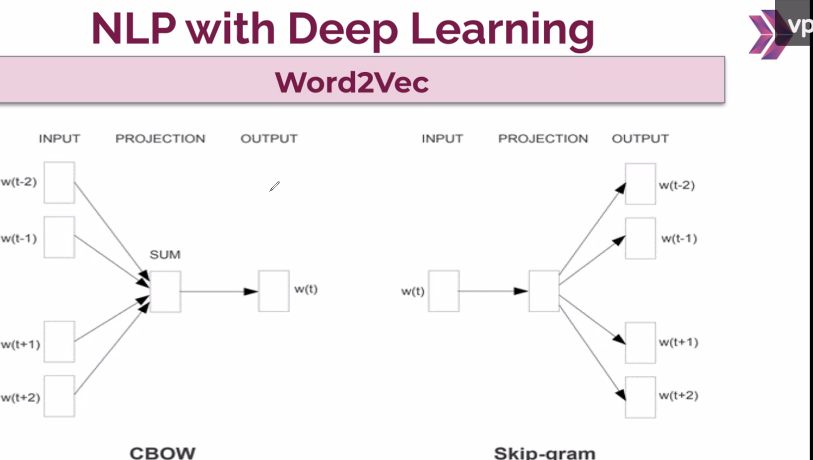

In [ ]:
# windows_size=2
# the nın quick ve the nın brown arasındaki ilişkileri kurup ve kalıpları öğreniyor(training de)
# .. anlamsal ilişkileri tokenlerin birbirleriyle sıklıkla kulanımlarımlarına göre kuruyordu
# .. örneğin quick ile the sıklıkla birlikte kullanılmıyorsa anlamsal ilişkileri düşük olacak
# .. örneğin quick ile brown sıklıkla birlikte kullanılıyorsa anlamsal ilişkileri yüksek olacak

# Glove(2014-stanford üni) : Word2Vec(google tarafından piyasaya sürüldü) de the ve quick 1 defa kullanıldı diyor ve  feature representation ı 
# .. güncelledi sonra başka bir yerde görünce tekrar
# .. feature representation ını güncelliyor ve bunu 1000 defa görürse 1000 defa güncelliyor
# .. glove, the ve quick datada kaç defa kullanılmış not alıyor, sonra diğer iki kelimeye bakıyor onların sayısını
# .. tutuyor(bu istatistiği tutuyor) sonra güncellemeyi tek seferde yapıyor. Bu yüzden glove biraz daha kullanışlıdır



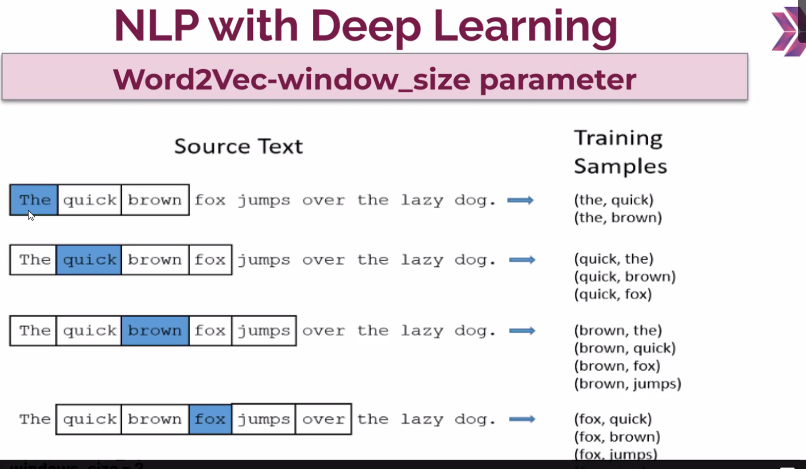

In [ ]:
# Glove ve word2vec sesteş leri tespit etmekte iyi değil. Yani tek taraflı çalışıyorlar
# ELMO ve BERT
# ilk cümlede Soldan sağa doğru model gider ve elmayı sevdiğimi görür sonra bir de sağdan sola gelerek derki
# .. bu marketten aldığımız elma
# Alttaki cümledede soldan sağa gider ve sağdan sola gider bu yediğimiz elmamı der sonra bakar bu o değil der
# .. ve bu 1. cümledeki the apple ile 2. the apple a farklı davranır. Glove ve word2vec bunlara aynı token muameleyi yapar

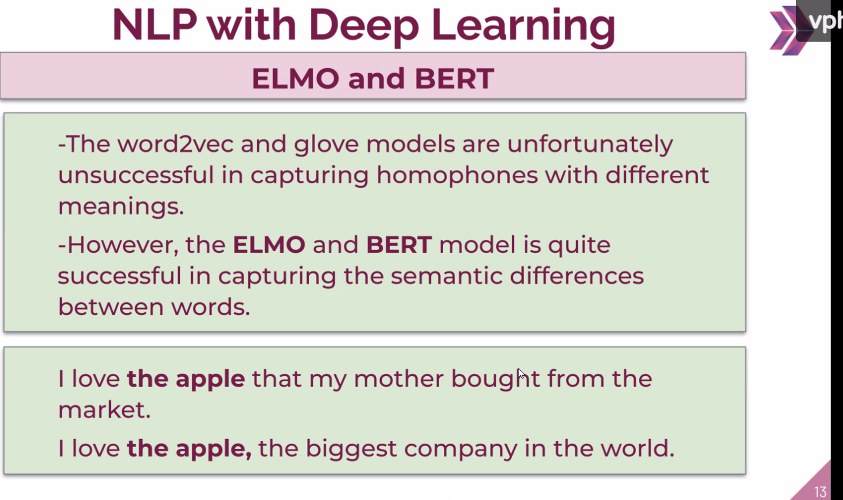

In [ ]:
# 15.10.2022 ders sonu

## Word2Vec

In [1]:
# pip install gensim

In [1]:
import warnings
warnings.filterwarnings("ignore")

from gensim.models import Word2Vec

In [2]:
import zipfile

text = zipfile.ZipFile('newspaper.zip') # 
text = text.read('newspaper.txt')
text = text.decode('utf-8')

text[:1000]
# Gazetelerden alinmis 400 bin satirdan olusan, cleaning islemi tamamlanmis bir datasetimiz var.
# zipli dosyayı okumak için kullanabilirisniz

'iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi \ngösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı \ndini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar \nmusevi ye ölüm ve idam idam sloganları duyuldu \nmuhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü \nden fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı \nöte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı \nhamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre münzevi yaşamı na

In [3]:
#text = open('newspaper.txt', 'r', encoding='utf8')
#text = text.read()
#text[:1000]

# dosyayı zip içerisinden çıkarsaydık. Bu formatı kullanacaktık.

In [4]:
print(text[:1000])

iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi 
gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı 
dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar 
musevi ye ölüm ve idam idam sloganları duyuldu 
muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü 
den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı 
öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı 
hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre münzevi yaşamı na rağmen 

In [5]:
list_sent = text.split('\n')
list_sent[:10]

['iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi ',
 'gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı ',
 'dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar ',
 'musevi ye ölüm ve idam idam sloganları duyuldu ',
 'muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü ',
 'den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı ',
 'öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı ',
 'hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere 

In [6]:
list_sent[0].split()

['iran',
 'devlet',
 'televizyonu',
 'ülkedeki',
 'eyaletin',
 'sinde',
 'yapılan',
 'reformcuları',
 'protesto',
 'amaçlı',
 'yürüyüşlere',
 'milyonlarca',
 'kişinin',
 'katıldığını',
 'bildirdi']

In [7]:
corpus = []

for sent in list_sent:
    corpus.append(sent.split())

# Text' i cumlelerden olusan bir liste haline getirmek icin text' i split ile böldük.
# .. for dongusu ile ise cumleleri kelimelerine ayirdik ve corpus degiskenine atadik

In [8]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [9]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)

In [10]:
model.wv['ankara']

array([ 0.02029699, -0.37284663, -0.15364948,  0.21681233,  0.5876878 ,
       -0.05924001, -0.39061362,  0.4579546 , -0.181981  , -0.06752916,
       -0.20330429, -0.29585806, -0.10795538,  0.33179042, -0.5283247 ,
        0.23800536,  0.25089648, -0.5757522 ,  0.33711615, -0.49639386,
        0.03138389,  0.4472793 ,  0.51764846, -0.51579   ,  0.00396478,
       -0.07910887, -0.32536262,  0.0946449 , -0.55059105,  0.64909995,
        0.4134576 ,  0.1386678 ,  0.08427678, -0.2813596 , -0.02578606,
       -0.351792  , -0.4181183 ,  0.13511112,  0.07741225, -0.34854588,
        0.51856863, -0.02897582,  0.22776127, -0.40091318,  0.52867836,
        0.1791202 , -0.54900223, -0.038741  ,  0.05872977,  0.01537743,
       -0.13070194, -0.13936731,  0.35755193,  0.01846687, -0.16952085,
       -0.01944207,  0.05013495,  0.15384543, -0.3703079 , -0.52271414,
        0.18248166,  0.2698679 ,  0.09448964, -0.03580072, -0.22675805,
       -0.04184262,  0.35365206,  0.3092698 , -0.21804802, -0.05

In [11]:
model.wv.most_similar('öğretmen')

[('okuldaki', 0.7687126994132996),
 ('öğretmenin', 0.7525213956832886),
 ('öğretmeni', 0.7468001246452332),
 ('öğrenciye', 0.7372488975524902),
 ('üniversite', 0.7185764908790588),
 ('erkekten', 0.7177760004997253),
 ('öğrencisinin', 0.7125263214111328),
 ('öğrenciyle', 0.7114567756652832),
 ('erkek', 0.7109895944595337),
 ('lise', 0.7101007699966431)]

In [12]:
model.wv.most_similar('kırmızı')

[('çizgileri', 0.6551694869995117),
 ('gömlekli', 0.648025393486023),
 ('gömlekliler', 0.6267078518867493),
 ('renkli', 0.6244071125984192),
 ('sarı', 0.6136674880981445),
 ('çizgi', 0.5996519923210144),
 ('bülten', 0.5965977311134338),
 ('bültenle', 0.5908676981925964),
 ('gömleklilerin', 0.5831193923950195),
 ('ışıkta', 0.5830473899841309)]

In [13]:
model.wv.most_similar('eve')

[('evine', 0.7938315868377686),
 ('dükkana', 0.7823595404624939),
 ('apartmana', 0.7477869391441345),
 ('mağazaya', 0.7298651337623596),
 ('restorana', 0.7221091985702515),
 ('köye', 0.716070830821991),
 ('kulübüne', 0.7159844636917114),
 ('arabaya', 0.714925229549408),
 ('karakola', 0.7033239006996155),
 ('arabasına', 0.703190267086029)]

In [14]:
model.wv.most_similar('mavi')

[('marmara', 0.8943449854850769),
 ('gemisine', 0.6924837231636047),
 ('baskınıyla', 0.666350245475769),
 ('baskınına', 0.6378120183944702),
 ('gemisinde', 0.6332560181617737),
 ('filo', 0.6286171674728394),
 ('gemilere', 0.6130682229995728),
 ('baskınının', 0.6124998927116394),
 ('filosundaki', 0.6091967821121216),
 ('dökme', 0.6078406572341919)]

In [15]:
model.wv.most_similar(positive=['öğrenme', 'doktor'], negative=['tedavi'], topn=5)

[('psikoloji', 0.6588769555091858),
 ('almancayı', 0.6563118696212769),
 ('kaliteli', 0.6481300592422485),
 ('derslerinin', 0.6466033458709717),
 ('imamlara', 0.6453168988227844)]

In [16]:
model.wv.most_similar(positive=['ankara', 'belçika'], negative=['brüksel'], topn=1)

[('danimarka', 0.6286811828613281)]

In [17]:
model.save("word2vec.model")

In [18]:
model = Word2Vec.load("word2vec.model")

## Glove

In [19]:
from gensim.models import KeyedVectors

In [20]:
glove_model = 'glove.6B.100d.txt'
model2 = KeyedVectors.load_word2vec_format(glove_model, no_header=True) #'glove.6B.100d.txt'

In [21]:
model2['teacher']

array([ 0.44374 ,  0.67311 , -0.51096 ,  0.20882 , -0.10662 ,  0.55098 ,
       -0.035593,  0.25126 , -0.32789 ,  1.0762  , -0.49637 , -0.4298  ,
        0.36764 ,  0.57894 , -0.25027 , -0.41021 ,  0.086998, -0.16843 ,
       -0.85764 ,  1.0404  , -1.0314  ,  0.095147,  0.30729 ,  0.12348 ,
        0.22745 , -0.52157 , -0.72478 , -1.0843  ,  0.035966,  0.62985 ,
       -1.0991  ,  0.67161 ,  0.33797 ,  0.14551 , -0.90049 , -0.064415,
       -0.75247 ,  0.21741 ,  0.51594 , -0.46291 , -0.77598 ,  0.40705 ,
        0.1889  , -0.43402 ,  0.23202 , -0.081453, -0.3882  , -0.34444 ,
        0.080225, -0.28274 , -0.38869 , -0.58152 , -0.25558 ,  1.0027  ,
       -0.11114 , -1.5402  , -0.16761 , -0.26558 ,  0.9325  ,  0.069397,
        0.96618 ,  0.15449 , -0.22905 , -0.1761  ,  0.13225 , -0.55741 ,
        0.9234  , -0.04845 ,  0.50202 ,  1.0144  , -0.1256  ,  0.30486 ,
        0.090808,  0.17642 , -0.23146 ,  0.68386 ,  0.37269 , -0.37316 ,
       -0.025728, -1.0279  , -0.33142 ,  0.036028, 

In [22]:
model2.most_similar('ankara')

[('turkey', 0.7512096762657166),
 ('istanbul', 0.6787630319595337),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322181820869446),
 ('erdogan', 0.6258037090301514),
 ('moscow', 0.6217040419578552),
 ('brussels', 0.6181439161300659),
 ('skopje', 0.6164302825927734),
 ('cyprus', 0.6064029932022095)]

In [23]:
model2.most_similar('teacher')

[('student', 0.8083399534225464),
 ('school', 0.7545564770698547),
 ('teaching', 0.7521439790725708),
 ('taught', 0.741184651851654),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134960293769836),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315354347229),
 ('education', 0.6528989672660828)]

In [24]:
model2.most_similar('doctor')

[('physician', 0.7673239707946777),
 ('nurse', 0.75215083360672),
 ('dr.', 0.7175194025039673),
 ('doctors', 0.7080884575843811),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995992660522461),
 ('surgeon', 0.6905338168144226),
 ('hospital', 0.6900930404663086),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

In [25]:
model2.most_similar(positive=['woman', 'brother'], negative=['man'], topn=1)

[('daughter', 0.8917792439460754)]

In [26]:
model2.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

[('mother', 0.9024619460105896)]

In [27]:
model2.most_similar(positive=['woman', 'uncle'], negative=['man'], topn=1)

[('aunt', 0.836803138256073)]

In [28]:
model2.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=1)

[('turkey', 0.81471186876297)]

In [29]:
model2.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)

[('teacher', 0.7610154151916504)]

In [30]:
model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

In [31]:
model2.most_similar(positive=['love', 'jealous'], negative=['hate'], topn=1)

[('lover', 0.7032662630081177)]